In [2]:
import geopandas as gpd
from fiona.crs import from_epsg

eesti60 = gpd.read_file('yle_60_rahvastik.shp')
eesti60.sample(5)

,VID,KOOD,NIMI,VAARTUS,STAMP_CRE,JUHUSLIK,GEOKODEER8,kokku,KOOD2,FID_1,...,NIMI_12_16,VAARTUS_16,STAMP_CR_5,JUHUSLIK_5,GEOKODEE_5,85_van,KOOD2_1_16,60_yle,60yle_osak,geometry
67,59283914.0,0668,Rapla vald,13193,2020-03-20,0.0,0.0,13193.0,668,62,...,Rapla vald,328,2020-03-20,0.0,0.0,328,668,3538.0,26.8172,"POLYGON ((530573.553 6546667.559, 530671.697 6..."
77,59283898.0,0689,Ruhnu vald,141,2020-03-20,0.0,0.0,141.0,689,77,...,Ruhnu vald,1,2020-03-20,0.0,0.0,1,689,29.0,20.5674,"POLYGON ((453175.775 6407652.974, 453582.087 6..."
46,59283850.0,0567,Paide linn,10590,2020-03-20,0.0,0.0,10590.0,567,22,...,Paide linn,294,2020-03-20,0.0,0.0,294,567,3154.0,29.7828,"POLYGON ((579875.042 6549978.301, 581146.444 6..."
0,59283867.0,0191,Haljala vald,4321,2020-03-20,0.0,0.0,4321.0,191,13,...,Haljala vald,129,2020-03-20,0.0,0.0,129,191,1303.0,30.1551,"POLYGON ((601542.991 6601424.391, 601629.384 6..."
59,59283906.0,0726,Saue vald,22050,2020-03-20,0.0,0.0,22050.0,726,60,...,Saue vald,375,2020-03-20,0.0,0.0,375,726,4329.0,19.6327,"POLYGON ((504300.952 6554529.496, 504405.385 6..."


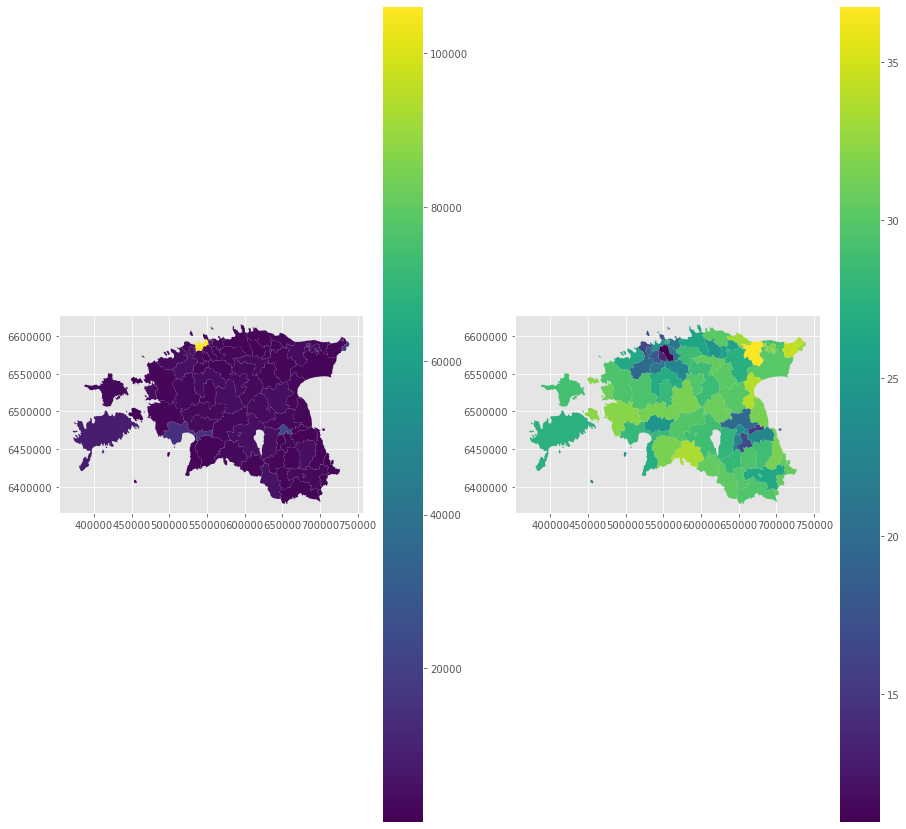

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 15)

# 60_yle – 60y and older population number
# 60yle_osak – proportion of 60y and older from the total population
fig, (ax1, ax2) = plt.subplots(1, 2)

eesti60.plot(ax=ax1, column="60_yle", legend=True)
eesti60.plot(ax=ax2, column="60yle_osak", legend=True)

In [4]:
print(eesti60.dtypes)
print(eesti60.columns)



VID            float64
KOOD            object
NIMI            object
VAARTUS         object
STAMP_CRE       object
                ...   
85_van           int64
KOOD2_1_16       int64
60_yle         float64
60yle_osak     float64
geometry      geometry
Length: 69, dtype: object
Index(['VID', 'KOOD', 'NIMI', 'VAARTUS', 'STAMP_CRE', 'JUHUSLIK', 'GEOKODEER8',
       'kokku', 'KOOD2', 'FID_1', 'VID_1', 'KOOD_1', 'NIMI_1', 'VAARTUS_1',
       '60_64', 'KOOD2_1', 'FID_12', 'VID_12', 'KOOD_12', 'NIMI_12',
       'VAARTUS_12', 'STAMP_CR_1', 'JUHUSLIK_1', 'GEOKODEE_1', '65_69',
       'KOOD2_12', 'FID_12_13', 'VID_12_13', 'KOOD_12_13', 'NIMI_12_13',
       'VAARTUS_13', 'STAMP_CR_2', 'JUHUSLIK_2', 'GEOKODEE_2', '70_74',
       'KOOD2_1_13', 'FID_12__14', 'VID_12__14', 'KOOD_12_14', 'NIMI_12_14',
       'VAARTUS_14', 'STAMP_CR_3', 'JUHUSLIK_3', 'GEOKODEE_3', '75_79',
       'KOOD2_1_14', 'FID_12__15', 'VID_12__15', 'KOOD_12_15', 'NIMI_12_15',
       'VAARTUS_15', 'STAMP_CR_4', 'JUHUSLIK_4', 'GEO

In [5]:
eesti60.to_file('eesti60.geojson', driver="GeoJSON", encoding="UTF-8")

In [6]:
import geopandas as gpd
from fiona.crs import from_epsg
from shapely.geometry import MultiPoint, Point
import pandas as pd
import numpy as np

geo3 = eesti60.to_crs(epsg=4326)

centrepoint_ca = MultiPoint([x.centroid for x in geo3.geometry]).centroid
print(centrepoint_ca)

POINT (25.68216463044492 58.78560090900145)


In [7]:
import folium
from shapely.geometry import MultiPolygon

m = folium.Map(location=[centrepoint_ca.y, centrepoint_ca.x],
               zoom_start=7,
               tiles='cartodbpositron',
               control_scale=True,
               prefer_canvas=True,
               width=800,
               height=600)

m

In [8]:
geo3

,VID,KOOD,NIMI,VAARTUS,STAMP_CRE,JUHUSLIK,GEOKODEER8,kokku,KOOD2,FID_1,...,NIMI_12_16,VAARTUS_16,STAMP_CR_5,JUHUSLIK_5,GEOKODEE_5,85_van,KOOD2_1_16,60_yle,60yle_osak,geometry
0,59283867.0,0191,Haljala vald,4321,2020-03-20,0.0,0.0,4321.0,191,13,...,Haljala vald,129,2020-03-20,0.0,0.0,129,191,1303.0,30.1551,"POLYGON ((25.79494 59.53816, 25.79659 59.54060..."
1,59283866.0,0903,Viru-Nigula vald,5782,2020-03-20,0.0,0.0,5782.0,903,8,...,Viru-Nigula vald,187,2020-03-20,0.0,0.0,187,903,1913.0,33.0854,"POLYGON ((26.37623 59.51222, 26.37780 59.51262..."
2,59283861.0,0803,Toila vald,4735,2020-03-20,0.0,0.0,4735.0,803,0,...,Toila vald,120,2020-03-20,0.0,0.0,120,803,1387.0,29.2925,"POLYGON ((27.15763 59.35974, 27.17247 59.37143..."
3,59283863.0,0321,Kohtla-Järve linn,33743,2020-03-20,0.0,0.0,33743.0,321,1,...,Kohtla-Järve linn,1098,2020-03-20,0.0,0.0,1098,321,11102.0,32.9016,"MULTIPOLYGON (((27.55430 59.37255, 27.55671 59..."
4,59283862.0,0251,Jõhvi vald,12056,2020-03-20,0.0,0.0,12056.0,251,2,...,Jõhvi vald,386,2020-03-20,0.0,0.0,386,251,3842.0,31.8679,"POLYGON ((27.27452 59.35862, 27.28332 59.37253..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,59283907.0,0638,Põhja-Pärnumaa vald,8235,2020-03-20,0.0,0.0,8235.0,638,73,...,Põhja-Pärnumaa vald,251,2020-03-20,0.0,0.0,251,638,2585.0,31.3904,"POLYGON ((24.25848 58.63239, 24.26064 58.64422..."
75,59283894.0,0714,Saaremaa vald,31091,2020-03-20,0.0,0.0,31091.0,714,74,...,Saaremaa vald,867,2020-03-20,0.0,0.0,867,714,8518.0,27.3970,"MULTIPOLYGON (((23.00875 58.63185, 23.00876 58..."
76,59283896.0,0478,Muhu vald,1876,2020-03-20,0.0,0.0,1876.0,478,76,...,Muhu vald,88,2020-03-20,0.0,0.0,88,478,606.0,32.3028,"MULTIPOLYGON (((23.41416 58.63329, 23.41419 58..."
77,59283898.0,0689,Ruhnu vald,141,2020-03-20,0.0,0.0,141.0,689,77,...,Ruhnu vald,1,2020-03-20,0.0,0.0,1,689,29.0,20.5674,"POLYGON ((23.21237 57.80825, 23.21896 57.81959..."


In [9]:
import folium
from shapely.geometry import MultiPolygon
import branca.colormap as cm

m = folium.Map(location=[centrepoint_ca.y, centrepoint_ca.x],
               zoom_start=7,
               tiles='cartodbpositron',
               control_scale=True,
               prefer_canvas=True,
               width=800,
               height=600)

geo3['geoid'] = geo3.index.astype(str)

grid = geo3[['geoid', 'NIMI', '60_yle','60yle_osak' , 'geometry']]

grid_jsontxt = grid.to_json()

folium.Choropleth(
    geo_data=grid_jsontxt,
    data=grid,
    bins=5,
    columns=['geoid', '60yle_osak' ],
    key_on='feature.id',
    fill_opacity=0.6,
    line_opacity=0.4,
    line_color='black',
    line_weight=1,
    legend_name='60 ja vanemate osakaal (%) | Eesti KOV-ides 2019. aasta seisuga',
    name='60 ja vanemate inimeste osakaal rahvastikust',
    highlight=True,
    fill_color='Purples'
).add_to(m)

folium.LayerControl(collapsed=True).add_to(m)


In [10]:
m

In [11]:
m.save("docs/index.html")